<a href="https://colab.research.google.com/github/wahyudimasdi/MSIB-Project-Showcase/blob/main/Sentiment%20Analysis%20for%20Google%20Play%20Store%20Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Analisis Sentimen Ulasan Aplikasi Google Play Store dengan
Model Support Vektor Machine (SVM)**

---



Berikut adalah g-drive untuk keperluan code:
https://drive.google.com/drive/folders/18uDyPzAqLC8uORj4lt_glI0J6bdLN7za?usp=drive_link

# PREPROCESSING DATA

In [ ]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd

## Data Preparation

In [ ]:
#import file langsung dari drive
!gdown 1rIWqaQ9ik1oYNERjBQnOL1TbNZftiYPE

Downloading...
From: https://drive.google.com/uc?id=1rIWqaQ9ik1oYNERjBQnOL1TbNZftiYPE
To: /content/reviews.csv
100% 6.45M/6.45M [00:00<00:00, 107MB/s]


In [ ]:
data = pd.read_csv('/content/reviews.csv')
data.head(10)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,gp:AOqpTOEhZuqSqqWnaKRgv-9ABYdajFUB0WugPGh-SG-...,Eric Tie,https://play-lh.googleusercontent.com/a-/AOh14...,I cannot open the app anymore,1,0,5.4.0.6,2020-10-27 21:24:41,NaN,NaN,newest,com.anydo
1,gp:AOqpTOH0WP4IQKBZ2LrdNmFy_YmpPCVrV3diEU9KGm3...,john alpha,https://play-lh.googleusercontent.com/a-/AOh14...,I have been begging for a refund from this app...,1,0,NaN,2020-10-27 14:03:28,"Please note that from checking our records, yo...",2020-10-27 15:05:52,newest,com.anydo
2,gp:AOqpTOEMCkJB8Iq1p-r9dPwnSYadA5BkPWTf32Z1azu...,Sudhakar .S,https://play-lh.googleusercontent.com/a-/AOh14...,Very costly for the premium version (approx In...,1,0,NaN,2020-10-27 08:18:40,NaN,NaN,newest,com.anydo
3,gp:AOqpTOGFrUWuKGycpje8kszj3uwHN6tU_fd4gLVFy9z...,SKGflorida@bellsouth.net DAVID S,https://play-lh.googleusercontent.com/-75aK0WF...,"Used to keep me organized, but all the 2020 UP...",1,0,NaN,2020-10-26 13:28:07,What do you find troublesome about the update?...,2020-10-26 14:58:29,newest,com.anydo
4,gp:AOqpTOHls7DW8wmDFzTkHwxuqFkdNQtKHmO6Pt9jhZE...,Louann Stoker,https://play-lh.googleusercontent.com/-pBcY_Z-...,Dan Birthday Oct 28,1,0,5.6.0.7,2020-10-26 06:10:50,NaN,NaN,newest,com.anydo
5,gp:AOqpTOEvElPsBa6k8rLDmk-WrEoJea98KUrIGYWodJe...,Jon Clemens,https://play-lh.googleusercontent.com/-q6L1fx0...,It has changed how I viewed my different lists...,1,1,5.6.0.7,2020-10-26 05:04:20,Please note that in order to sort the lists by...,2020-10-26 14:56:25,newest,com.anydo
6,gp:AOqpTOGHb-APKKMNFyL1OwuGq1AGW6bQp5aYYxSHvJx...,Gale W,https://play-lh.googleusercontent.com/a-/AOh14...,I'm only looking for a grocery list app but ev...,1,0,5.6.0.6,2020-10-25 23:40:46,Sorry about that. We are not aware of any issu...,2020-10-26 14:53:42,newest,com.anydo
7,gp:AOqpTOEcxvv_c0CK3G5tHjxXsGSjbzD65OQ3og02p-q...,No One,https://play-lh.googleusercontent.com/a-/AOh14...,"Reset my free trial, new phone I'd like to see...",1,0,5.5.0.8,2020-10-25 19:18:13,We have an extensive Help Center detailing how...,2020-10-26 14:43:36,newest,com.anydo
8,gp:AOqpTOHVgr7_qOhORsfPwnVCqX-n98dJ1Ksrps6q52p...,I Dewa Gede Nopi Ariana,https://play-lh.googleusercontent.com/a-/AOh14...,How do to stop monthly payment because i don't...,1,0,5.6.0.7,2020-10-25 10:09:00,Please note that you may cancel your subscript...,2020-10-26 14:39:59,newest,com.anydo
9,gp:AOqpTOHQ_paQ_ffWsMqGOWmMsPxs-pBkBgR_3H63WJv...,John Riddle,https://play-lh.googleusercontent.com/a-/AOh14...,I complain about not crashes and it was immedi...,1,1,5.6.0.7,2020-10-23 03:15:01,We are unaware of any issues with the app not ...,2020-10-25 17:11:06,newest,com.anydo


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12495 entries, 0 to 12494
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              12495 non-null  object
 1   userName              12495 non-null  object
 2   userImage             12495 non-null  object
 3   content               12495 non-null  object
 4   score                 12495 non-null  int64 
 5   thumbsUpCount         12495 non-null  int64 
 6   reviewCreatedVersion  10333 non-null  object
 7   at                    12495 non-null  object
 8   replyContent          5818 non-null   object
 9   repliedAt             5818 non-null   object
 10  sortOrder             12495 non-null  object
 11  appId                 12495 non-null  object
dtypes: int64(2), object(10)
memory usage: 1.1+ MB


In [ ]:
data.describe()

,score,thumbsUpCount
count,12495.000000,12495.000000
mean,3.094198,3.047459
std,1.457693,14.303903
min,1.000000,0.000000
25%,2.000000,0.000000
50%,3.000000,0.000000
75%,4.000000,1.000000
max,5.000000,397.000000


In [ ]:
# Menentukan kolom yang ingin dilihat kategorinya
column_name = 'sortOrder'

# Memastikan kolom tersebut ada dalam dataframe
if column_name in data.columns:
    # Menampilkan kategori pada kolom tertentu
    categories = data[column_name].unique()
    print(f"Kategori pada kolom '{column_name}':")
    for category in categories:
        print(category)

    # Menghitung jumlah kategori
    num_categories = len(categories)
    print(f"\nJumlah kategori pada kolom '{column_name}': {num_categories}")
else:
    print(f"Kolom '{column_name}' tidak ditemukan dalam dataframe.")


Kategori pada kolom 'sortOrder':
newest

Jumlah kategori pada kolom 'sortOrder': 1


In [ ]:
# Karena Akan difokuskan kepada review aplikasinya, maka dapat dilakukan drop untuk beberapa kolom yang kurang berfokus kepada review/contentnya.
# 'replyContent','repliedAt' dapat dihapus karena lebih mengarah ke balasan terhadap reviewnya bukan reviewnya itu sendiri
# 'reviewCreatedVersion' dapat dihapus dengan mengasumsikan sentiment analysis dilakukan untuk semua version pada dataset
# 'sortOrder' dapat dihapus karena berisi nilai kategorik dan cuma ada 1 kateegori didalamnya
# 'appId' dapat dihapus karena tidak berkaitan dengan analisis yang akan dilakukan
data.drop(['replyContent','repliedAt', 'reviewCreatedVersion', 'sortOrder', 'appId'],axis=1, inplace=True)
data.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,at
0,gp:AOqpTOEhZuqSqqWnaKRgv-9ABYdajFUB0WugPGh-SG-...,Eric Tie,https://play-lh.googleusercontent.com/a-/AOh14...,I cannot open the app anymore,1,0,2020-10-27 21:24:41
1,gp:AOqpTOH0WP4IQKBZ2LrdNmFy_YmpPCVrV3diEU9KGm3...,john alpha,https://play-lh.googleusercontent.com/a-/AOh14...,I have been begging for a refund from this app...,1,0,2020-10-27 14:03:28
2,gp:AOqpTOEMCkJB8Iq1p-r9dPwnSYadA5BkPWTf32Z1azu...,Sudhakar .S,https://play-lh.googleusercontent.com/a-/AOh14...,Very costly for the premium version (approx In...,1,0,2020-10-27 08:18:40
3,gp:AOqpTOGFrUWuKGycpje8kszj3uwHN6tU_fd4gLVFy9z...,SKGflorida@bellsouth.net DAVID S,https://play-lh.googleusercontent.com/-75aK0WF...,"Used to keep me organized, but all the 2020 UP...",1,0,2020-10-26 13:28:07
4,gp:AOqpTOHls7DW8wmDFzTkHwxuqFkdNQtKHmO6Pt9jhZE...,Louann Stoker,https://play-lh.googleusercontent.com/-pBcY_Z-...,Dan Birthday Oct 28,1,0,2020-10-26 06:10:50


## Handling Missing Value

In [ ]:
# menghitung persen missing value
rows = data.shape[0]
mv = data.isnull().sum()
mp = (mv / rows)*100
mp

reviewId         0.0
userName         0.0
userImage        0.0
content          0.0
score            0.0
thumbsUpCount    0.0
at               0.0
dtype: float64

Data aman dari missing value (missing value sebesar 0%)

## Data Exploration

In [ ]:
data.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,at
0,gp:AOqpTOEhZuqSqqWnaKRgv-9ABYdajFUB0WugPGh-SG-...,Eric Tie,https://play-lh.googleusercontent.com/a-/AOh14...,I cannot open the app anymore,1,0,2020-10-27 21:24:41
1,gp:AOqpTOH0WP4IQKBZ2LrdNmFy_YmpPCVrV3diEU9KGm3...,john alpha,https://play-lh.googleusercontent.com/a-/AOh14...,I have been begging for a refund from this app...,1,0,2020-10-27 14:03:28
2,gp:AOqpTOEMCkJB8Iq1p-r9dPwnSYadA5BkPWTf32Z1azu...,Sudhakar .S,https://play-lh.googleusercontent.com/a-/AOh14...,Very costly for the premium version (approx In...,1,0,2020-10-27 08:18:40
3,gp:AOqpTOGFrUWuKGycpje8kszj3uwHN6tU_fd4gLVFy9z...,SKGflorida@bellsouth.net DAVID S,https://play-lh.googleusercontent.com/-75aK0WF...,"Used to keep me organized, but all the 2020 UP...",1,0,2020-10-26 13:28:07
4,gp:AOqpTOHls7DW8wmDFzTkHwxuqFkdNQtKHmO6Pt9jhZE...,Louann Stoker,https://play-lh.googleusercontent.com/-pBcY_Z-...,Dan Birthday Oct 28,1,0,2020-10-26 06:10:50


In [ ]:
# Ubah date jadi data time series
data.rename(columns={'at':'date'},inplace=True) #ubah nama date
data['date'] = pd.to_datetime(data['date']).dt.date

In [ ]:
# memisahkan tahun dan bulan
data['year'] = pd.to_datetime(data['date']).dt.year
data['month'] = pd.to_datetime(data['date']).dt.month

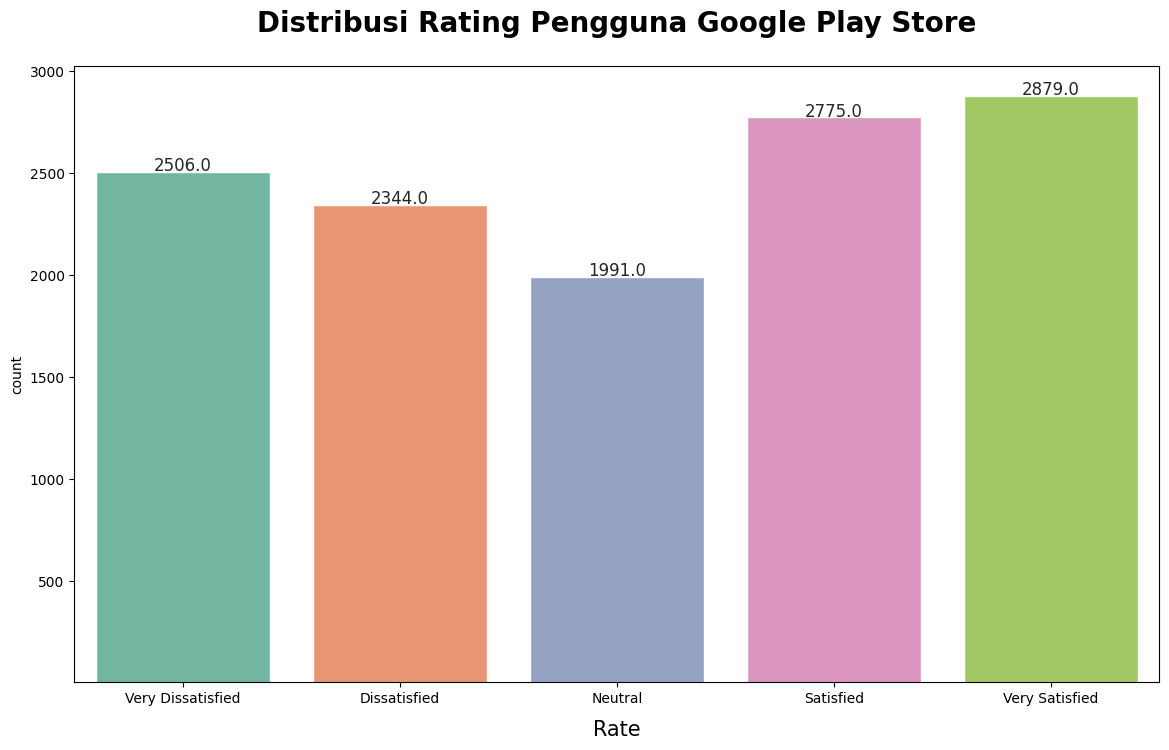

In [ ]:
# visualisasi bar chart untuk melihat jumlah rating pengguna Google Play Store
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(14,8))
position = (0,1,2,3,4)
labels = ("Very Dissatisfied","Dissatisfied","Neutral","Satisfied","Very Satisfied")

ax = sns.set_style('darkgrid')
ax = sns.countplot(x="score", data=data, palette="Set2")

for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,
             rect.get_height()+ 3.25,rect.get_height(),
             horizontalalignment='center', fontsize = 12)

plt.title('Distribusi Rating Pengguna Google Play Store', fontsize=20, fontweight='bold', pad=25)
plt.xlabel('Rate', fontsize=15, labelpad=10)
plt.xticks(position, labels)
plt.ylim(1)
plt.show()

Sekilas jumlah pengguna Aplikasi Google Play Store mulai dari yang sangat tidak puas sampai yang sangat puas hampir sama. Oleh karena itu akan kita lakukan analisis lebih lanjut dengan membagi berdasarkan tahun review.

In [ ]:
grouped_data = data.groupby(['score', 'year']).size().reset_index(name='count')
label_mapping = {
    "Very Dissatisfied": 0,
    "Dissatisfied": 1,
    "Neutral": 2,
    "Satisfied": 3,
    "Very Satisfied": 4}
grouped_data['score'] = grouped_data['score'].map(label_mapping)

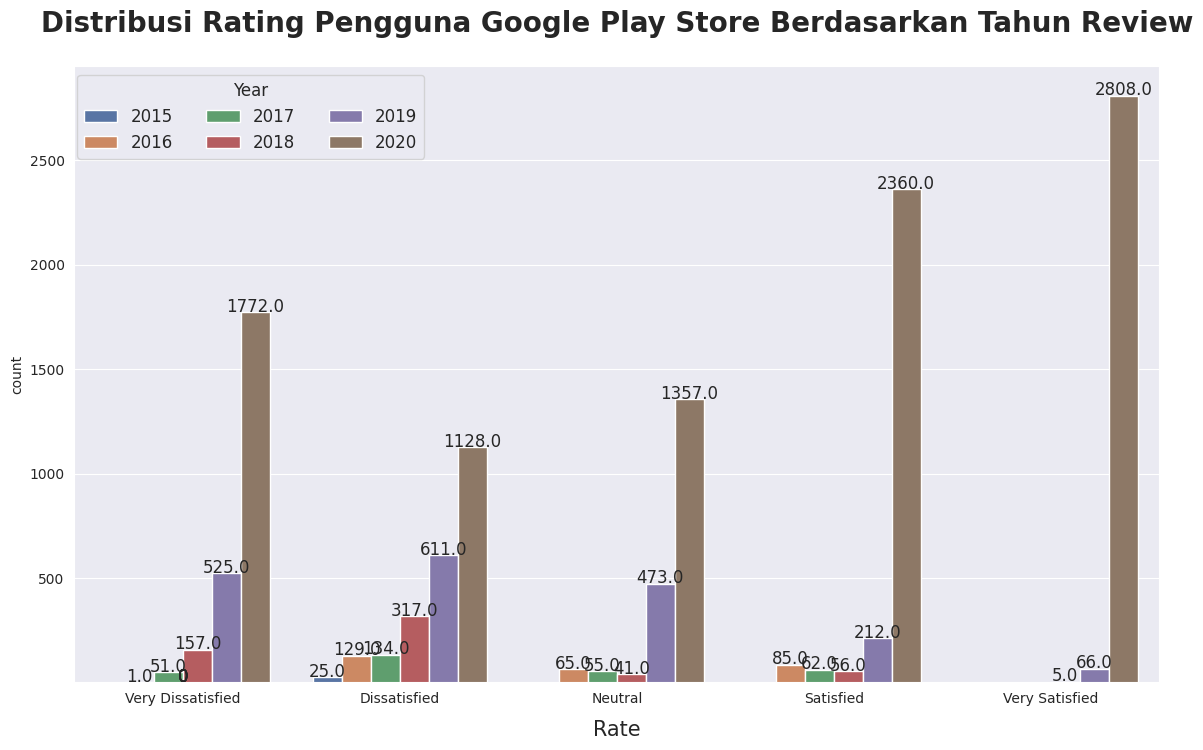

In [ ]:
# membagi bar chart pada sel sebelumnya berdasarkan tahun reviewnya
fig, ax = plt.subplots(figsize=(14,8))
position = (0,1,2,3,4)
labels = ("Very Dissatisfied","Dissatisfied","Neutral","Satisfied","Very Satisfied")

ax = sns.set_style('darkgrid')
ax = sns.countplot(x="score", hue="year", data=data, palette="deep")

for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,
             rect.get_height()+ 3.25,rect.get_height(),
             horizontalalignment='center', fontsize = 12)

plt.legend(fontsize=12, bbox_to_anchor=(0.33,1), ncol = 3, title="Year", title_fontsize=12)
plt.title('Distribusi Rating Pengguna Google Play Store Berdasarkan Tahun Review', fontsize=20,
          fontweight='bold', pad=25)
plt.xlabel('Rate', fontsize=15, labelpad=10)
plt.xticks(position, labels)
plt.ylim(1)
plt.show()

Jika dilihat sekilas dari perkembangannya tentunya terlihat bahwa semakin banyak pengguna aplikasi google play store dari tahun ke tahun. Tetapi bila dicermati lebih dalam, peningkatan nilai pengguna dengan score 4 (yang puas) dan 5 (sangat puas) meningkat sangat jauh dibanding dengan tingkat kepuasan yang dibawahnya. Oleh karena itu kita bisa mendapat dugaan awal bahwa semakin kesini, aplikasi google play store semakin berkembang ke arah yang lebih baik. Oleh karena itu kita akan telah lebih jauh menggunakan sentiment analysis.

# Sentiment Analysis

## Data Cleansing

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12495 entries, 0 to 12494
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   reviewId       12495 non-null  object
 1   userName       12495 non-null  object
 2   userImage      12495 non-null  object
 3   content        12495 non-null  object
 4   score          12495 non-null  int64 
 5   thumbsUpCount  12495 non-null  int64 
 6   date           12495 non-null  object
 7   year           12495 non-null  int64 
 8   month          12495 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 878.7+ KB


In [ ]:
data.drop(['reviewId','userName','userImage','score','thumbsUpCount','date','year','month'], axis=1, inplace=True)

In [ ]:
print(data.info())
print()
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12495 entries, 0 to 12494
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  12495 non-null  object
dtypes: object(1)
memory usage: 97.7+ KB
None

                                             content
0                      I cannot open the app anymore
1  I have been begging for a refund from this app...
2  Very costly for the premium version (approx In...
3  Used to keep me organized, but all the 2020 UP...
4                                Dan Birthday Oct 28


In [ ]:
# Cek data duplikat
print(data.duplicated().sum())
data.drop_duplicates(inplace=True)
print()
print(data.duplicated().sum())

688

0


Ulasan sudah bersih dari data yang berduplikasi dan siap untuk melanjutkan proses, yaitu persiapan data untuk membersihkan ulasan dari emoji, tanda baca, ketidakserasian jenis huruf, pengulangan kata, normalisasi, dll.

## Case Folding

In [ ]:
# merubah jenis huruf menjadi huruf kecil
def lowercase(review_text):
  low = review_text.lower()
  return low

data['clean'] = data['content'].apply(lambda low:lowercase(str(low)))
data.head(5)

,content,clean
0,I cannot open the app anymore,i cannot open the app anymore
1,I have been begging for a refund from this app...,i have been begging for a refund from this app...
2,Very costly for the premium version (approx In...,very costly for the premium version (approx in...
3,"Used to keep me organized, but all the 2020 UP...","used to keep me organized, but all the 2020 up..."
4,Dan Birthday Oct 28,dan birthday oct 28


## Remove Emoji

In [ ]:
import re

def remove_emoji(review_text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002500-\U00002BEF"  # chinese char
                           u"\U00002702-\U000027B0"
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\U0001f926-\U0001f937"
                           u"\U00010000-\U0010ffff"
                           u"\u2640-\u2642"
                           u"\u2600-\u2B55"
                           u"\u200d"
                           u"\u23cf"
                           u"\u23e9"
                           u"\u231a"
                           u"\ufe0f"  # dingbats
                           u"\u3030"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', review_text)

data['clean'] = data['clean'].apply(lambda emoji: remove_emoji(emoji))

## Remove Hastag

In [ ]:
# menghapus hashtag dari ulasan yang biasanya digunakan oleh pengguna untuk memberikan tagar terkait topik dari ulasan yang diutarakan
def remove_hashtag(review_text, default_replace=""):
  hashtag = re.sub(r'#\w+', default_replace, review_text)
  return hashtag

data['clean'] = data['clean'].apply(lambda hashtag: remove_hashtag(hashtag))

## Remove Punctuation and Number

In [ ]:
# menghapus angka dalam ulasan
def remove_number(review_text, default_replace=" "):
  num = re.sub(r'\d+', default_replace, review_text)
  return num

data['clean'] = data['clean'].apply(lambda num: remove_number(num))

In [ ]:
# menghapus tanda baca
import string
def remove_punctuation(review_text, default_text=" "):
  list_punct = string.punctuation
  delete_punct = str.maketrans(list_punct,' '*len(list_punct))
  new_review = ' '.join(review_text.translate(delete_punct).split())

  return new_review

data['clean'] = data['clean'].apply(lambda punct: remove_punctuation(punct))

In [ ]:
# menghapus superscript dalam ulasan yang biasa digunakan oleh pengguna dalam mengulangi kata
def remove_superscript(review_text):
  number = re.compile("["u"\U00002070"
                      u"\U000000B9"
                      u"\U000000B2-\U000000B3"
                      u"\U00002074-\U00002079"
                      u"\U0000207A-\U0000207E"
                      u"U0000200D"
                      "]+", flags=re.UNICODE)
  return number.sub(r'', review_text)

data['clean'] = data['clean'].apply(lambda num: remove_superscript(num))

## Remove Words Repetition

In [ ]:
# melakukan pembatasan jumlah huruf menjadi dua untuk mengembalikan kata ke bentuk awal
# dan menghindari terjadinya kata ganda yang memiliki arti sama tetapi berbeda penulisan
def word_repetition(review_text):
  review = re.sub(r'(.)\1+', r'\1\1', review_text)
  return review

data['clean'] = data['clean'].apply(lambda word: word_repetition(word))

In [ ]:
# melakukan pembatasan kata berulang menjadi satu kali, seperti suka suka -> suka
def repetition(review_text):
  repeat = re.sub(r'\b(\w+)(?:\W\1\b)+', r'\1',review_text, flags=re.IGNORECASE)
  return repeat

data['clean'] = data['clean'].apply(lambda word: repetition(word))

## Remove Whitespaces

In [ ]:
# menghapus spasi berlebih dalam ulasan

def remove_extra_whitespaces(review_text):
  review = re.sub(r'\s+',' ', review_text)
  return review

data['clean'] = data['clean'].apply(lambda extra_spaces: remove_extra_whitespaces(extra_spaces))

## Remove Another Words Which Doesn't Give Any Information

In [ ]:
bannedword = ['hahaha', 'aowkaowkok', 'awokawok', 'sksksk', 'xixi', 'xixixi', 'XD',
              'wkwkw','wkwkwk','hihi','cok','hihihi','hehehe','hehehehe','hehe',
               'huhu','huhuu','ancok','guak','cokcok','hhmm','annya','huftt',
              'uqjy', 'dehdje', 'jwdnmb', 'wxvlezuvws', 'ircel', 'swjjw', 'dmv',
              'dxrgz','qjtajuq','zzhwntdft','xywrfw' ,'fztnmdrrduy' ,'xsezuz',
               'kbyv', 'iyyveyzqkdgm', 'arlrmdjy', 'sfarif', 'sfomar']

re_banned_words = re.compile(r"\b(" + "|".join(bannedword) + ")\\W", re.I)

def RemoveBannedWords(toPrint):
    global re_banned_words
    return re_banned_words.sub("", toPrint)

data['clean'] = data['clean'].apply(lambda banned:RemoveBannedWords(banned))

In [ ]:
!gdown --id 1QqUDIwF2n3N-WqwsbR8UR4xN3FqRW3Z7

slangs = open('slang.txt',"r",encoding="utf-8", errors='replace')

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1QqUDIwF2n3N-WqwsbR8UR4xN3FqRW3Z7
To: /content/slang.txt
100% 1.74k/1.74k [00:00<00:00, 4.00MB/s]


In [ ]:
clear_slangs= []
for newlines in slangs:
  strip_re = newlines.strip("\n")
  split = re.split(r'[:]',strip_re)
  clear_slangs.append(split)

print(clear_slangs)

[['2', ' to'], ['4', ' for'], ['abt', ' about'], ['acc', ' account'], ['ad', ' advertisement'], ['adv', ' advertisement'], ['app', ' application'], ['apps', ' application'], ['atm', ' at the moment'], ['b4', ' before'], ['bae', ' before anyone else'], ['bff', ' best friends forever'], ['brb', ' be right back'], ['btw', ' by the way'], ['collab', ' collaboration'], ['comm', ' communication'], ['comp', ' computer'], ['conf', ' conference'], ['cont', ' content'], ['cont', ' contract'], ['cust', ' customer'], ['cuz', ' because'], ['dep', ' department'], ['dev', ' development'], ['doc', ' document'], ['docu', ' documentation'], ['dunno', ' do not know'], ['eq', ' equipment'], ['eval', ' evaluation'], ['exp', ' experience'], ['fomo', ' fear of missing out'], ['ftw', ' for the win'], ['fyi', ' for your information'], ['gonna', ' going to'], ['gotta', ' got to'], ['gr8', ' great'], ['gtg', ' got to go'], ['hbd', ' happy birthday'], ['hmu', ' hit me up'], ['idc', ' I do not care'], ['idk', ' I 

In [ ]:
slangs = [[k.strip(), v.strip()] for k,v in clear_slangs]
dict_slangs = {key:values for key,values in slangs}
dict_slangs

{'2': 'to',
 '4': 'for',
 'abt': 'about',
 'acc': 'account',
 'ad': 'advertisement',
 'adv': 'advertisement',
 'app': 'application',
 'apps': 'application',
 'atm': 'at the moment',
 'b4': 'before',
 'bae': 'before anyone else',
 'bff': 'best friends forever',
 'brb': 'be right back',
 'btw': 'by the way',
 'collab': 'collaboration',
 'comm': 'communication',
 'comp': 'computer',
 'conf': 'conference',
 'cont': 'contract',
 'cust': 'customer',
 'cuz': 'because',
 'dep': 'department',
 'dev': 'development',
 'doc': 'document',
 'docu': 'documentation',
 'dunno': 'do not know',
 'eq': 'equipment',
 'eval': 'evaluation',
 'exp': 'experience',
 'fomo': 'fear of missing out',
 'ftw': 'for the win',
 'fyi': 'for your information',
 'gonna': 'going to',
 'gotta': 'got to',
 'gr8': 'great',
 'gtg': 'got to go',
 'hbd': 'happy birthday',
 'hmu': 'hit me up',
 'idc': 'I do not care',
 'idk': 'I do not know',
 'ily': 'I love you',
 'imho': 'in my humble opinion',
 'imo': 'in my opinion',
 'imy': 

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from textblob import TextBlob

clean_text = []
for review in data['clean']:
  wordlist = TextBlob(review).words
  for k,v in enumerate(wordlist):
    if v in dict_slangs.keys():
      wordlist[k] = dict_slangs[v]
  clean_text.append(' '.join(wordlist))

In [ ]:
clean_text

['i can not open the application anymore',
 'i have been begging for a refund from this application for over a month and nobody is replying me',
 'very costly for the premium version approx indian rupees per year better to download the premium version of this application from apkmos website and use it microsoft to do list application is far more better',
 'used to keep me organized but all the updates have made a mess of things y cudn t you leave well enuf alone guess ur techies feel the need to keep making changes to justify continuing to collect their salary',
 'dan birthday oct',
 'it has changed how i viewed my different lists now they are all jumbled together and i can t find what i need',
 'i m only looking for a grocery list application but every time i tap away from the application i have to tap again after opening it again to see the list i can t find a way to keep a certain list showing when i open or reopen the application eta in response to the reply it doesn t work like th

In [ ]:
data['normalization'] = clean_text
data.head()

,content,clean,normalization
0,I cannot open the app anymore,i cannot open the app anymore,i can not open the application anymore
1,I have been begging for a refund from this app...,i have been begging for a refund from this app...,i have been begging for a refund from this app...
2,Very costly for the premium version (approx In...,very costly for the premium version approx ind...,very costly for the premium version approx ind...
3,"Used to keep me organized, but all the 2020 UP...",used to keep me organized but all the updates ...,used to keep me organized but all the updates ...
4,Dan Birthday Oct 28,dan birthday oct,dan birthday oct


## delete words containing 3 letters

In [ ]:
def remove_small_words(text):
  text = re.sub(r'\b\w{1,3}\b','',text)
  return text

data['final_text'] = data['normalization'].apply(lambda remove: remove_small_words(str(remove)))

## Word Tokenizing

In [ ]:
from nltk.tokenize import word_tokenize

In [ ]:
def word_token(review_text):
  return word_tokenize(review_text)

data['token'] = data['final_text'].apply(lambda tokenize:word_token(str(tokenize)))
data.head()

,content,clean,normalization,final_text,token
0,I cannot open the app anymore,i cannot open the app anymore,i can not open the application anymore,open application anymore,"[open, application, anymore]"
1,I have been begging for a refund from this app...,i have been begging for a refund from this app...,i have been begging for a refund from this app...,have been begging refund from this applicat...,"[have, been, begging, refund, from, this, appl..."
2,Very costly for the premium version (approx In...,very costly for the premium version approx ind...,very costly for the premium version approx ind...,very costly premium version approx indian ru...,"[very, costly, premium, version, approx, india..."
3,"Used to keep me organized, but all the 2020 UP...",used to keep me organized but all the updates ...,used to keep me organized but all the updates ...,used keep organized updates have made me...,"[used, keep, organized, updates, have, made, m..."
4,Dan Birthday Oct 28,dan birthday oct,dan birthday oct,birthday,[birthday]


## Wordcloud Visualization

In [ ]:
review_all = []

for review in data['final_text']:
  text = review.split()
  for token_review in text:
    print(token_review)
    review_all.append(token_review)

Streaming output truncated to the last 5000 lines.
notification
tones
however
biggest
issues
that
receive
notifications
from
planner
event
created
phone
calendar
assuming
this
issue
since
only
half
less
than
half
total
events
tasks
sound
also
will
sound
when
have
reminders
many
different
times
original
default
reminder
minutes
before
event
time
changed
time
then
would
make
other
reminders
need
will
only
sound
minutes
before
event
time
matter
what
tell
using
this
application
work
diligence
when
first
installed
application
sure
could
search
notes
words
doing
something
wrong
that
function
available
this
application
does
have
ending
time
event
take
notes
have
made
copy
them
over
laptop
have
looked
where
notes
save
seem
find
them
anywhere
please
help
whenever
open
have
turn
phone
sideways
because
locked
horizontal
even
after
turn
auto
rotate
good
application
that
putting
appointments
problem
that
notifications
make
sure
reminds
have
droid
turbo
guys
could
that
will
change
stars
hello
develo

In [ ]:
# menampilkan kata dengan jumlah kemunculan yang paling dibahas oleh pengguna
from nltk import FreqDist
freq_dist = FreqDist(review_all)
print("how many frequency distribution samples from an entire google play store's review")
freq_dist

how many frequency distribution samples from an entire google play store's review


FreqDist({'application': 8215, 'this': 4621, 'that': 3065, 'have': 2644, 'with': 2182, 'like': 1726, 'time': 1562, 'tasks': 1520, 'good': 1512, 'great': 1405, ...})

In [ ]:
# menampilkan 1000 kata yang paling sering muncul

common_review = freq_dist.most_common(1000)
print(common_review)

[('application', 8215), ('this', 4621), ('that', 3065), ('have', 2644), ('with', 2182), ('like', 1726), ('time', 1562), ('tasks', 1520), ('good', 1512), ('great', 1405), ('very', 1342), ('would', 1342), ('just', 1328), ('calendar', 1209), ('when', 1198), ('really', 1197), ('task', 1150), ('love', 1084), ('only', 1083), ('there', 1075), ('more', 1064), ('version', 1012), ('your', 987), ('work', 967), ('list', 900), ('from', 861), ('what', 839), ('they', 778), ('will', 769), ('premium', 761), ('even', 739), ('need', 723), ('phone', 709), ('after', 701), ('doesn', 699), ('free', 675), ('also', 675), ('update', 671), ('been', 667), ('make', 666), ('using', 661), ('some', 658), ('widget', 650), ('google', 632), ('which', 625), ('because', 621), ('want', 620), ('other', 618), ('please', 605), ('could', 596), ('features', 579), ('easy', 576), ('used', 567), ('sync', 563), ('much', 546), ('then', 545), ('nice', 538), ('feature', 534), ('option', 531), ('best', 523), ('still', 522), ('does', 52

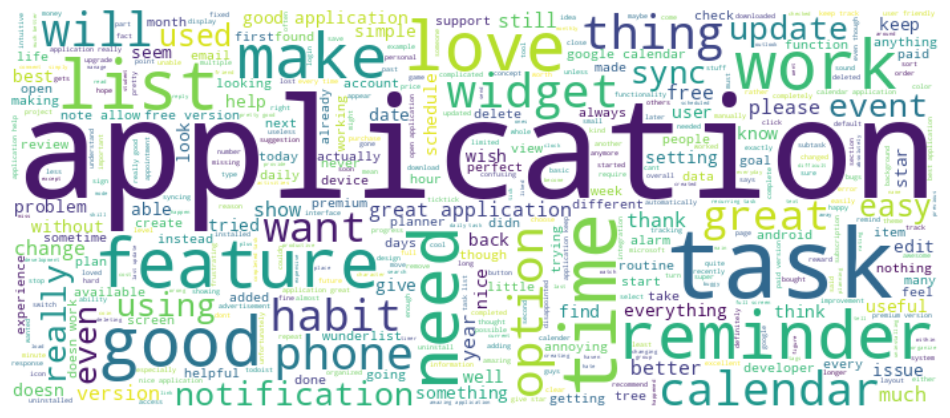

In [ ]:
# membuat visualisasi WordCloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

join_review = ' '.join(review_all)

w_cloud = WordCloud(background_color="white",
                    width=700, height=300, max_font_size=120,
                    max_words=1000, contour_color='blue',
                    contour_width=2).generate(str(join_review))

# plot wordcloud
plt.figure(figsize=(12,12))
plt.imshow(w_cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
# memasukkan 1000 sampel kata beserta jumlah kemunculan ke dalam dataframe

most_freq_df = pd.DataFrame(common_review, columns=['words','count'])
most_freq_df.sort_values(by='count', ascending=False)

,words,count
0,application,8215
1,this,4621
2,that,3065
3,have,2644
4,with,2182
...,...,...
974,garbage,26
973,health,26
972,interested,26
971,instructions,26


In [ ]:
# mengurutkan kata sampel berdasarkan jumlah kemunculan yang diurutkan secara descending
# kemudian mengambil 15 kata sampel

most_freq_df.sort_values(by='count', ascending=False)
top15 = most_freq_df.iloc[:15]

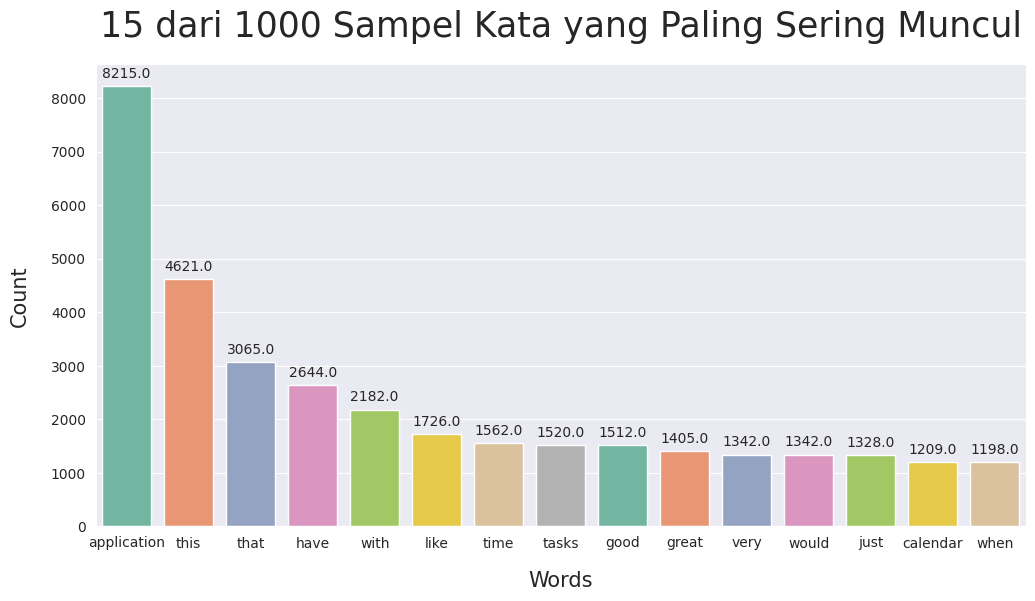

In [ ]:
# membuat visualisasi 15 sampel kata yang paling sering dibicarakan oleh pengguna

plt.figure(figsize=(12,6))
sns.set_style('darkgrid')

ax = sns.barplot(x='words', y='count', data=top15, palette = 'Set2')
for annotate in ax.patches:
  ax.annotate(format(annotate.get_height(), '.1f'),
              (annotate.get_x() + annotate.get_width()/2.,
               annotate.get_height()), ha = 'center', va='center', xytext=(0,9),
               textcoords = 'offset points')
plt.title("15 dari 1000 Sampel Kata yang Paling Sering Muncul", fontsize=25, pad=20)
plt.xlabel('Words', fontsize=15, labelpad=15)
plt.ylabel('Count', fontsize=15, labelpad=15)
plt.show()

## Remove Stopword

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('popular')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data] 

True

In [ ]:
# menampilkan kata stopwords bahasa inggris
english_stop = stopwords.words('english')

# menghitung jumlah kata stopwords bahasa inggris
print('length of english stopwords:', len(english_stop))

length of english stopwords: 179


In [ ]:
# memasukkan stopwords bahasa inggris ke dalam dataframe
stopwords_english = pd.DataFrame(english_stop, columns=['stopwords_english'])

In [ ]:
# menyimpan stopwords bahasa inggris ke dalam format xlsx
stopwords_english.to_excel('stopwords_english.xlsx', index=False)

## Function that Used to Remove Stopwords

In [ ]:
def remove_stopwords(review_text, english_stopwords):
  tokenize = []
  for token in review_text:
    if token not in english_stopwords:
      tokenize.append(token)

  return tokenize

data['stop_review'] = data['token'].apply(lambda stop: remove_stopwords(stop, english_stop))

In [ ]:
data.head()

,content,clean,normalization,final_text,token,stop_review
0,I cannot open the app anymore,i cannot open the app anymore,i can not open the application anymore,open application anymore,"[open, application, anymore]","[open, application, anymore]"
1,I have been begging for a refund from this app...,i have been begging for a refund from this app...,i have been begging for a refund from this app...,have been begging refund from this applicat...,"[have, been, begging, refund, from, this, appl...","[begging, refund, application, month, nobody, ..."
2,Very costly for the premium version (approx In...,very costly for the premium version approx ind...,very costly for the premium version approx ind...,very costly premium version approx indian ru...,"[very, costly, premium, version, approx, india...","[costly, premium, version, approx, indian, rup..."
3,"Used to keep me organized, but all the 2020 UP...",used to keep me organized but all the updates ...,used to keep me organized but all the updates ...,used keep organized updates have made me...,"[used, keep, organized, updates, have, made, m...","[used, keep, organized, updates, made, mess, t..."
4,Dan Birthday Oct 28,dan birthday oct,dan birthday oct,birthday,[birthday],[birthday]


##Text Stemming

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Inisialisasi lemmatizer
lemmatizer = WordNetLemmatizer()

# Fungsi untuk melakukan lemmatization pada review_text
def back_to_root(review_text):
    # Tokenisasi teks
    tokens = review_text  # Tidak perlu tokenisasi jika teks sudah dalam bentuk token
    #Lemmatize setiap token dan gabungkan kembali menjadi satu string
    lemmatized_text = ' '.join([lemmatizer.lemmatize(token) for token in tokens])
    return lemmatized_text

# Gunakan fungsi back_to_root pada setiap data pada kolom 'stop_review'
data['lemmatized_review'] = data['stop_review'].apply(back_to_root)


In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Download wordnet dan punkt jika belum didownload
nltk.download('wordnet')
nltk.download('punkt')

# Inisialisasi lemmatizer
lemmatizer = WordNetLemmatizer()

# Fungsi untuk menentukan pos tag dari kata
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": nltk.corpus.wordnet.ADJ,
                "N": nltk.corpus.wordnet.NOUN,
                "V": nltk.corpus.wordnet.VERB,
                "R": nltk.corpus.wordnet.ADV}
    return tag_dict.get(tag, nltk.corpus.wordnet.NOUN)  # Default ke noun jika tidak ditemukan

# Fungsi untuk melakukan lemmatization pada review_text
def back_to_root(review_text):
    # Tokenisasi teks
    tokens = word_tokenize(review_text)
    # Lemmatize setiap token dan gabungkan kembali menjadi satu string
    lemmatized_text = ' '.join([lemmatizer.lemmatize(token, get_wordnet_pos(token)) for token in tokens])
    return lemmatized_text

# Gunakan fungsi back_to_root pada setiap data pada kolom 'lemmatized_review' dan simpan sebagai 'root_review'
data['root_review'] = data['lemmatized_review'].apply(back_to_root)
data['root_review'].head(50)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0                              open application anymore
1             beg refund application month nobody reply
2     costly premium version approx indian rupee yea...
3     use keep organize update make mess thing cudn ...
4                                              birthday
5     change view different list jumbled together fi...
6     look grocery list application every time away ...
7                      reset free trial phone like well
8              stop monthly payment application anymore
9     complain crash immediately fix good crash retu...
10    constant crash reading negative review uninsta...
11    widget useless always show task regardless cat...
12    horrible application described absolutely support
13    update october update delete task force create...
14          realize charge application want application
15    spam notification many task user complete week...
16                   download first thing try impressed
17                             longer work alexa

## Data Labeling

In [ ]:
def polarity(stem_review):
    return TextBlob(stem_review).sentiment.polarity

In [ ]:
data['polarity'] = data['root_review'].apply(polarity)
data.head()

,content,clean,normalization,final_text,token,stop_review,lemmatized_review,root_review,polarity
0,I cannot open the app anymore,i cannot open the app anymore,i can not open the application anymore,open application anymore,"[open, application, anymore]","[open, application, anymore]",open application anymore,open application anymore,0.000
1,I have been begging for a refund from this app...,i have been begging for a refund from this app...,i have been begging for a refund from this app...,have been begging refund from this applicat...,"[have, been, begging, refund, from, this, appl...","[begging, refund, application, month, nobody, ...",begging refund application month nobody replying,beg refund application month nobody reply,0.000
2,Very costly for the premium version (approx In...,very costly for the premium version approx ind...,very costly for the premium version approx ind...,very costly premium version approx indian ru...,"[very, costly, premium, version, approx, india...","[costly, premium, version, approx, indian, rup...",costly premium version approx indian rupee yea...,costly premium version approx indian rupee yea...,0.000
3,"Used to keep me organized, but all the 2020 UP...",used to keep me organized but all the updates ...,used to keep me organized but all the updates ...,used keep organized updates have made me...,"[used, keep, organized, updates, have, made, m...","[used, keep, organized, updates, made, mess, t...",used keep organized update made mess thing cud...,use keep organize update make mess thing cudn ...,-0.175
4,Dan Birthday Oct 28,dan birthday oct,dan birthday oct,birthday,[birthday],[birthday],birthday,birthday,0.000


In [ ]:
def sentiment(label):
    if label <0:
        return "Negative"
    elif label ==0:
        return "Neutral"
    elif label>0:
        return "Positive"

data['sentiment'] = data['polarity'].apply(sentiment)
data.head()

,content,clean,normalization,final_text,token,stop_review,lemmatized_review,root_review,polarity,sentiment
0,I cannot open the app anymore,i cannot open the app anymore,i can not open the application anymore,open application anymore,"[open, application, anymore]","[open, application, anymore]",open application anymore,open application anymore,0.000,Neutral
1,I have been begging for a refund from this app...,i have been begging for a refund from this app...,i have been begging for a refund from this app...,have been begging refund from this applicat...,"[have, been, begging, refund, from, this, appl...","[begging, refund, application, month, nobody, ...",begging refund application month nobody replying,beg refund application month nobody reply,0.000,Neutral
2,Very costly for the premium version (approx In...,very costly for the premium version approx ind...,very costly for the premium version approx ind...,very costly premium version approx indian ru...,"[very, costly, premium, version, approx, india...","[costly, premium, version, approx, indian, rup...",costly premium version approx indian rupee yea...,costly premium version approx indian rupee yea...,0.000,Neutral
3,"Used to keep me organized, but all the 2020 UP...",used to keep me organized but all the updates ...,used to keep me organized but all the updates ...,used keep organized updates have made me...,"[used, keep, organized, updates, have, made, m...","[used, keep, organized, updates, made, mess, t...",used keep organized update made mess thing cud...,use keep organize update make mess thing cudn ...,-0.175,Negative
4,Dan Birthday Oct 28,dan birthday oct,dan birthday oct,birthday,[birthday],[birthday],birthday,birthday,0.000,Neutral


In [ ]:
sentiment_counts = data['sentiment'].value_counts()
print("Jumlah setiap kategori pada variabel 'sentiment':")
print(sentiment_counts)

Jumlah setiap kategori pada variabel 'sentiment':
Positive    7400
Neutral     2890
Negative    1517
Name: sentiment, dtype: int64


In [ ]:
data[(data['sentiment']=='Neutral')]

,content,clean,normalization,final_text,token,stop_review,lemmatized_review,root_review,polarity,sentiment
0,I cannot open the app anymore,i cannot open the app anymore,i can not open the application anymore,open application anymore,"[open, application, anymore]","[open, application, anymore]",open application anymore,open application anymore,0.0,Neutral
1,I have been begging for a refund from this app...,i have been begging for a refund from this app...,i have been begging for a refund from this app...,have been begging refund from this applicat...,"[have, been, begging, refund, from, this, appl...","[begging, refund, application, month, nobody, ...",begging refund application month nobody replying,beg refund application month nobody reply,0.0,Neutral
2,Very costly for the premium version (approx In...,very costly for the premium version approx ind...,very costly for the premium version approx ind...,very costly premium version approx indian ru...,"[very, costly, premium, version, approx, india...","[costly, premium, version, approx, indian, rup...",costly premium version approx indian rupee yea...,costly premium version approx indian rupee yea...,0.0,Neutral
4,Dan Birthday Oct 28,dan birthday oct,dan birthday oct,birthday,[birthday],[birthday],birthday,birthday,0.0,Neutral
5,It has changed how I viewed my different lists...,it has changed how i viewed my different lists...,it has changed how i viewed my different lists...,changed viewed different lists they ju...,"[changed, viewed, different, lists, they, jumb...","[changed, viewed, different, lists, jumbled, t...",changed viewed different list jumbled together...,change view different list jumbled together fi...,0.0,Neutral
...,...,...,...,...,...,...,...,...,...,...
12467,I've used planner pro for 5 years or more now....,i ve used planner pro for years or more now co...,i ve used planner pro for years or more now co...,used planner years more couldn without,"[used, planner, years, more, couldn, without]","[used, planner, years, without]",used planner year without,use planner year without,0.0,Neutral
12479,😍,,,,[],[],,,0.0,Neutral
12487,vb,vb,vb,,[],[],,,0.0,Neutral
12489,its ok But we can not undestad repeated task s...,its ok but we can not undestad repeated task s...,its ok but we can not undestad repeated task s...,undestad repeated task shedule,"[undestad, repeated, task, shedule]","[undestad, repeated, task, shedule]",undestad repeated task shedule,undestad repeat task shedule,0.0,Neutral


In [ ]:
# menghapus content yang bersentimen netral karena tujuan dari penelitian ini hanya menggunakan 2 sentimen yaitu positif dan negatif
data = data.drop(data[data['sentiment'] == 'Neutral'].index)
data = data.reset_index(drop=True)

## Sentiment visualization

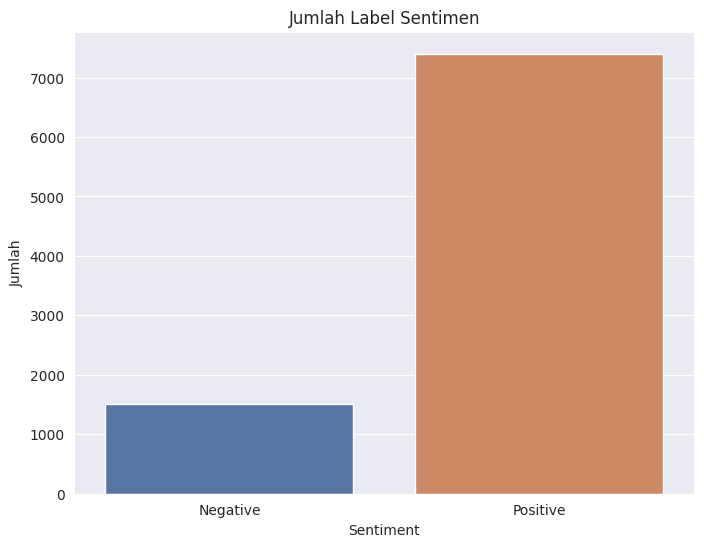

In [ ]:
# Menghitung jumlah setiap kategori pada variabel 'sentiment'
sentiment_counts = data['sentiment'].value_counts()

# Membuat bar plot menggunakan seaborn
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=data, palette='deep')

# Menambahkan judul dan label sumbu
plt.title('Jumlah Label Sentimen')
plt.xlabel('Sentiment')
plt.ylabel('Jumlah')

# Menampilkan bar plot
plt.show()

In [ ]:
# Melihat persentase label
total_data = len(data)
sentiment_percentage = (sentiment_counts / total_data) * 100
print("Persentase setiap kategori pada variabel 'sentiment':")
print(sentiment_percentage)


Persentase setiap kategori pada variabel 'sentiment':
Positive    82.987552
Negative    17.012448
Name: sentiment, dtype: float64


## Sentiment WordCloud

### Wordcloud for positive sentiment

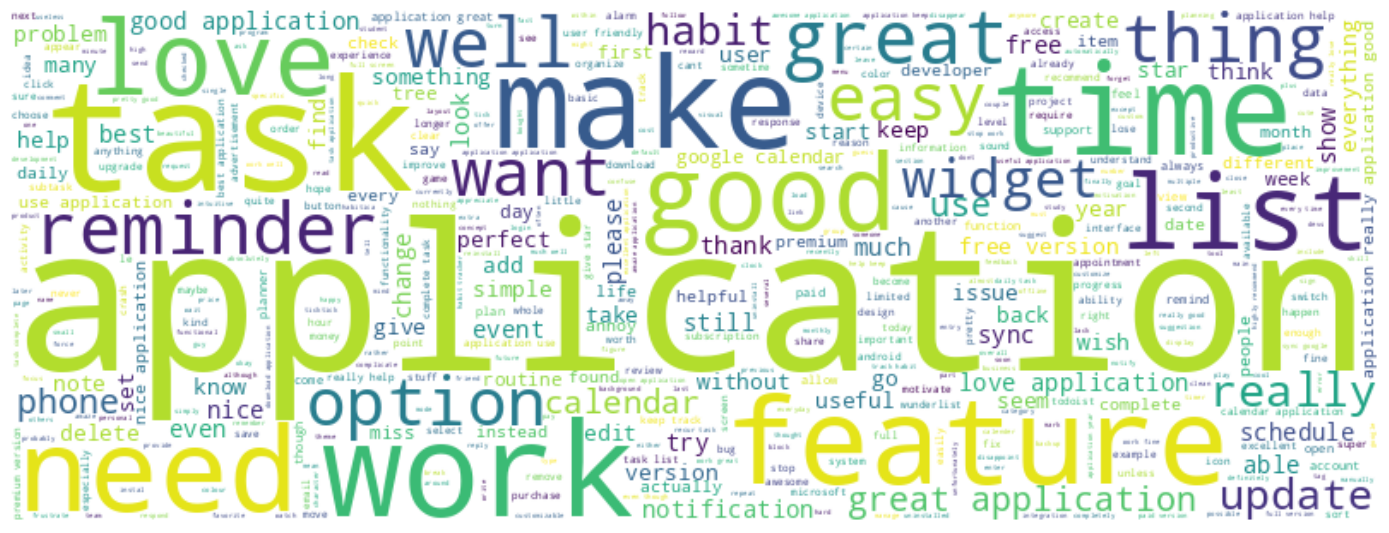

In [ ]:
sentiment_pos = ' '.join([review for review in data['root_review'][data['sentiment'] == "Positive"]])

# create object wordcloud
w_pos = WordCloud(background_color="white",
                  width=800, height=300, max_font_size=200,
                  max_words=500).generate(sentiment_pos)

plt.figure(figsize=(14,8))
plt.axis("off")
plt.tight_layout()
plt.imshow(w_pos, interpolation="bilinear")
plt.show()

### Wordcloud for negative sentiment

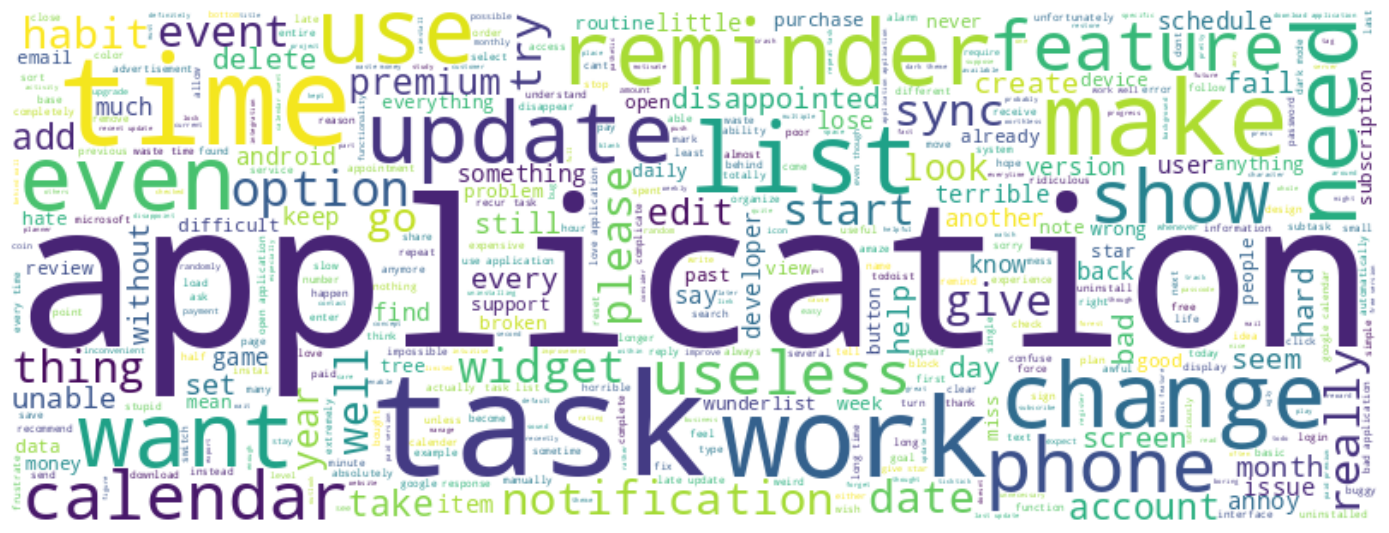

In [ ]:
sentiment_pos = ' '.join([review for review in data['root_review'][data['sentiment'] == "Negative"]])

# create object wordcloud
w_pos = WordCloud(background_color="white",
                  width=800, height=300, max_font_size=200,
                  max_words=500).generate(sentiment_pos)

plt.figure(figsize=(14,8))
plt.axis("off")
plt.tight_layout()
plt.imshow(w_pos, interpolation="bilinear")
plt.show()

## Split the review into data train and test

In [ ]:
data['sentiment'] = data['sentiment'].replace({'Positive': 1, 'Negative': -1})
X = data['root_review']
y = data['sentiment']

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score, precision_score

In [ ]:
test_num = []
random_num = []
acc_num = []
re_num = []
pre_num = []
matrix = []
report = []

for test in np.arange(0.1, 0.4, 0.1):
  for random in np.arange(0, 30, 5):
    print("test size:", test)
    print("random state:", random)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test, random_state=random)
    vectorizer = TfidfVectorizer(use_idf=True, smooth_idf=False)
    X_train_vect = vectorizer.fit_transform(X_train)
    X_test_vect = vectorizer.transform(X_test)
    SVM = SVC(kernel='linear')
    SVM.fit(X_train_vect, y_train)
    print(SVM.score(X_train_vect, y_train))
    predict = SVM.predict(X_test_vect)
    accuracy = accuracy_score(y_test, predict)
    confusion = confusion_matrix(y_test, predict)
    print('confusion matrix:\n', confusion)
    classfication = print(classification_report(y_test, predict))
    print("Accuracy Score:", accuracy.round(2))
    recall = recall_score(y_test, predict)
    print("Recall Score:", recall)
    precision = precision_score(y_test, predict)
    print("Precision Score:", precision)
    print("\n")

    random_num.append(random)
    matrix.append(confusion)
    report.append(classfication)
    acc_num.append(accuracy)
    re_num.append(recall)
    pre_num.append(precision)
    test_num.append(test)
  print("=================================================================")

test size: 0.1
random state: 0
0.9765732087227414
confusion matrix:
 [[ 97  56]
 [  9 730]]
              precision    recall  f1-score   support

          -1       0.92      0.63      0.75       153
           1       0.93      0.99      0.96       739

    accuracy                           0.93       892
   macro avg       0.92      0.81      0.85       892
weighted avg       0.93      0.93      0.92       892

Accuracy Score: 0.93
Recall Score: 0.9878213802435724
Precision Score: 0.9287531806615776


test size: 0.1
random state: 5
0.9764485981308412
confusion matrix:
 [[ 99  46]
 [ 15 732]]
              precision    recall  f1-score   support

          -1       0.87      0.68      0.76       145
           1       0.94      0.98      0.96       747

    accuracy                           0.93       892
   macro avg       0.90      0.83      0.86       892
weighted avg       0.93      0.93      0.93       892

Accuracy Score: 0.93
Recall Score: 0.9799196787148594
Precision Score:

In [ ]:
# memasukkan data ke dalam dataframe

data = {'test_size':test_num,
        'random_state':random_num,
        'confusion_matrix': matrix,
        'accuracy': acc_num,
        'recall': re_num,
        'precision': pre_num}

optimal = pd.DataFrame(data)
optimal
#optimal = optimal.sort_values(by=['accuracy','recall','precision'], ascending=True)

,test_size,random_state,confusion_matrix,accuracy,recall,precision
0,0.1,0,"[[97, 56], [9, 730]]",0.927130,0.987821,0.928753
1,0.1,5,"[[99, 46], [15, 732]]",0.931614,0.979920,0.940874
2,0.1,10,"[[117, 40], [10, 725]]",0.943946,0.986395,0.947712
3,0.1,15,"[[109, 52], [7, 724]]",0.933857,0.990424,0.932990
4,0.1,20,"[[104, 29], [10, 749]]",0.956278,0.986825,0.962725
5,0.1,25,"[[99, 42], [15, 736]]",0.936099,0.980027,0.946015
6,0.2,0,"[[209, 100], [17, 1458]]",0.934417,0.988475,0.935815
7,0.2,5,"[[183, 106], [24, 1471]]",0.927130,0.983946,0.932784
8,0.2,10,"[[209, 94], [27, 1454]]",0.932175,0.981769,0.939276
9,0.2,15,"[[208, 113], [13, 1450]]",0.929372,0.991114,0.927703


In [ ]:
# mengatur desimal akurasi, recall, dan precision menjadi 2 angka dibelakang koma
optimal['accuracy'] = optimal['accuracy'].apply(lambda floats:format(float(floats), ".2f"))
optimal['recall'] = optimal['recall'].apply(lambda floats:format(float(floats), ".2f"))
optimal['precision'] = optimal['precision'].apply(lambda floats:format(float(floats), ".2f"))
optimal['test_size'] = optimal['test_size'].apply(lambda floats:format(float(floats), ".1f"))
optimal

,test_size,random_state,confusion_matrix,accuracy,recall,precision
0,0.1,0,"[[97, 56], [9, 730]]",0.93,0.99,0.93
1,0.1,5,"[[99, 46], [15, 732]]",0.93,0.98,0.94
2,0.1,10,"[[117, 40], [10, 725]]",0.94,0.99,0.95
3,0.1,15,"[[109, 52], [7, 724]]",0.93,0.99,0.93
4,0.1,20,"[[104, 29], [10, 749]]",0.96,0.99,0.96
5,0.1,25,"[[99, 42], [15, 736]]",0.94,0.98,0.95
6,0.2,0,"[[209, 100], [17, 1458]]",0.93,0.99,0.94
7,0.2,5,"[[183, 106], [24, 1471]]",0.93,0.98,0.93
8,0.2,10,"[[209, 94], [27, 1454]]",0.93,0.98,0.94
9,0.2,15,"[[208, 113], [13, 1450]]",0.93,0.99,0.93


## Visualisasi grafik untuk melihat kenaikan akurasi terbaik berdasarkan test_size

In [ ]:
import plotly.express as px
fig = px.line(optimal, x='random_state', y='accuracy',color='test_size',
              text='accuracy', markers=True)
fig.update_traces(textposition='top left')
fig.show()

## Visualisasi grafik untuk melihat kenaikan recall terbaik berdasarkan test_size

In [ ]:
import plotly.express as px
fig = px.line(optimal, x='random_state', y='recall',color='test_size',
              text='recall', markers=True)
fig.update_traces(textposition='top left')
fig.show()

## Visualisasi grafik untuk melihat kenaikan precision terbaik berdasarkan test_size

In [ ]:
import plotly.express as px
fig = px.line(optimal, x='random_state', y='precision',color='test_size',
              text='precision', markers=True)
fig.update_traces(textposition='top left')
fig.show()

## Data Splitting into data train and data test

Berdasarkan hasil penelitian di atas terkait parameter test_size dan random_state terbaik, diperoleh bahwa ukuran test_size = 0,4 dan random_state = 10 memperoleh nilai akurasi, recall, dan precision lebih tinggi dibandingkan ukuran yang lain. Sehingga ukuran tersebut akan digunakan untuk melakukan splitting dataset.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=20)

In [ ]:
print(X_train.shape)
print()
print(X_test.shape)
print()
print(print(X_train))

(8025,)

(892,)

145                       ordinary update delete reminder
2253                       task habit dissappear complete
4405    good personalization make time explore applica...
1696    probably choice since wunderlist closing guy p...
8360    accept passcode today update paid user time ne...
                              ...                        
5910                    good application need improvement
3915    like application really help remind thing time...
7068    edit use application many year since release l...
7391                    good application really easy task
4367    good application lot customization notice issu...
Name: root_review, Length: 8025, dtype: object
None


## Vector Representation

### TF IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer(use_idf=True, smooth_idf=False)
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)
dense_num = X_train_vect.todense()

In [ ]:
X_train_vect

<8025x6136 sparse matrix of type '<class 'numpy.float64'>'
	with 108176 stored elements in Compressed Sparse Row format>

In [ ]:
print(X_train_vect)

  (0, 4429)	0.3083159585932756
  (0, 1349)	0.3687472247846651
  (0, 5759)	0.2990213448380743
  (0, 3682)	0.8243500404691848
  (1, 1022)	0.3683401522610603
  (1, 1526)	0.8427811502171598
  (1, 2365)	0.31651732592755155
  (1, 5308)	0.23208241522918552
  (2, 5589)	0.4353270357932313
  (2, 1161)	0.1711996725833952
  (2, 3057)	0.1486974021569017
  (2, 1414)	0.3118700550730195
  (2, 207)	0.2166995817820317
  (2, 6044)	0.1378610282232917
  (2, 5587)	0.2804031088670168
  (2, 5388)	0.1989353954949901
  (2, 2169)	0.2816662378115403
  (2, 755)	0.2756877130212993
  (2, 292)	0.06907376214953856
  (2, 1893)	0.32033038347781007
  (2, 5445)	0.12751814557660346
  (2, 3164)	0.13901032290685847
  (2, 3891)	0.4051232185317521
  (2, 2286)	0.12332775484531629
  (3, 4888)	0.2950942962833428
  :	:
  (8022, 3190)	0.22094266890853964
  (8022, 5788)	0.16672906529240672
  (8022, 4274)	0.16610542567436698
  (8022, 4869)	0.24130651741299386
  (8022, 292)	0.16724728054809526
  (8022, 3164)	0.16829182131380394
  (802

In [ ]:
#df_tf = pd.DataFrame(X_train_vect.todense(), columns = vectorizer.get_feature_names_out())
#df_tf.to_excel('tfidf.xlsx', index=False, header=True)

## Data Modeling

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score
svm = SVC(kernel='linear')
svm.fit(X_train_vect, y_train)

SVC(kernel='linear')

In [ ]:
predict = svm.predict(X_test_vect)
predict

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,
       -1,  1, -1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [ ]:
predict_df = pd.DataFrame(predict, columns=['predict'])
predict_df

,predict
0,1
1,1
2,1
3,1
4,1
...,...
887,1
888,1
889,1
890,1


In [ ]:
print(svm.coef_) # values of weight

  (0, 4691)	0.3006587832872876
  (0, 425)	0.3006587832872876
  (0, 2223)	0.30481332255246735
  (0, 4121)	0.434207275739508
  (0, 5737)	0.15168961588761917
  (0, 5703)	0.1411651019888092
  (0, 591)	0.1411651019888092
  (0, 1355)	0.3304441339678254
  (0, 117)	0.6804589401093596
  (0, 2123)	0.3216094259483026
  (0, 1863)	0.34558690214953497
  (0, 5909)	0.31125545196742294
  (0, 3214)	0.09630000357970553
  (0, 4288)	0.1691149528505792
  (0, 3711)	0.259888057572721
  (0, 3685)	0.3875327351848153
  (0, 4820)	0.13193857300040876
  (0, 3673)	0.14177520631677926
  (0, 2966)	0.14177520631677926
  (0, 1089)	0.4088767822191745
  (0, 1053)	0.41976325568420664
  (0, 4906)	0.29236798403342196
  (0, 5133)	0.02913829377136815
  (0, 2373)	0.022609903907402258
  (0, 5164)	0.10466630008937794
  :	:
  (0, 3339)	-0.011222980974268465
  (0, 3044)	-0.04873720981279314
  (0, 2680)	-2.394241245555672
  (0, 1870)	-0.44116183695572225
  (0, 1842)	0.43373720858901155
  (0, 976)	0.17611461228118452
  (0, 292)	0.737

In [ ]:
print(svm.classes_) # class of sentiment

[-1  1]


In [ ]:
print(svm.dual_coef_)

  (0, 0)	-1.0
  (0, 1)	-0.6806329070587348
  (0, 2)	-1.0
  (0, 3)	-1.0
  (0, 4)	-1.0
  (0, 5)	-1.0
  (0, 6)	-0.4341721157029035
  (0, 7)	-0.3029133804439583
  (0, 8)	-0.23520957048229546
  (0, 9)	-1.0
  (0, 10)	-1.0
  (0, 11)	-1.0
  (0, 12)	-1.0
  (0, 13)	-1.0
  (0, 14)	-1.0
  (0, 15)	-0.99539756693851
  (0, 16)	-1.0
  (0, 17)	-0.8127932210964269
  (0, 18)	-0.6792050440295792
  (0, 19)	-1.0
  (0, 20)	-1.0
  (0, 21)	-1.0
  (0, 22)	-0.41162236248279316
  (0, 23)	-1.0
  (0, 24)	-1.0
  :	:
  (0, 2555)	0.2231059618891076
  (0, 2556)	0.3967900426590432
  (0, 2557)	0.04101195499245078
  (0, 2558)	1.0
  (0, 2559)	1.0
  (0, 2560)	0.18635150440020584
  (0, 2561)	0.1634533982679398
  (0, 2562)	0.6073479897389054
  (0, 2563)	0.5287757884842506
  (0, 2564)	0.2387510892625742
  (0, 2565)	1.0
  (0, 2566)	1.0
  (0, 2567)	1.0
  (0, 2568)	1.0
  (0, 2569)	1.0
  (0, 2570)	0.10999598997016143
  (0, 2571)	1.0
  (0, 2572)	1.0
  (0, 2573)	0.5092568839034414
  (0, 2574)	0.0255880099464876
  (0, 2575)	1.0
  (0,

In [ ]:
svm.score(X_train_vect, y_train) # the mean accuracy on the given train data and labels.

0.9769470404984424

In [ ]:
svm.score(X_test_vect, y_test) # the mean accuracy on the given train data and labels.

0.9562780269058296

In [ ]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, predict))

0.17488789237668162


## Final Visualization that represented the result of Predicted

In [ ]:
predict_df = pd.DataFrame(predict, columns=['predictvalues'])
polarity = ""
sentimen = []
for sentiment in predict_df['predictvalues']:
  if sentiment == 1:
    polarity = "positif"
  else:
    polarity = "negatif"

  sentimen.append(polarity)

predict_df['sentimen'] = sentimen

print(predict_df.predictvalues.value_counts()[1])
print(predict_df.predictvalues.value_counts()[-1])

778
114


In [ ]:
prediction_df_group = predict_df.groupby(['predictvalues'])[['sentimen']].count().reset_index()
prediction_df_group

,predictvalues,sentimen
0,-1,114
1,1,778


In [ ]:
print("Number of sentiment after modelling:")
sen_pos = predict_df.predictvalues.value_counts()[1]/predict_df.predictvalues.value_counts().sum()*100
print("percentage of positive sentiment:", round(sen_pos,2), '%')

sen_neg = predict_df.predictvalues.value_counts()[-1]/predict_df.predictvalues.value_counts().sum()*100
print("percentage of negative sentiment:", round(sen_neg,2), '%')

print("difference between percentage positive and negative:", round(sen_pos-sen_neg,2), '%')

Number of sentiment after modelling:
percentage of positive sentiment: 87.22 %
percentage of negative sentiment: 12.78 %
difference between percentage positive and negative: 74.44 %


### Pie Chart

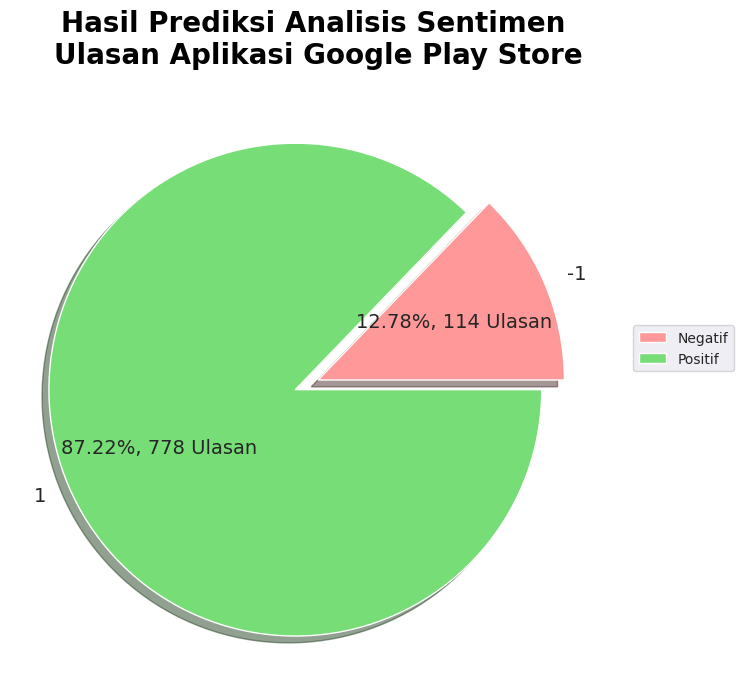

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
explode = (0,0.1)
my_colors = ['#ff9999','#77dd77']
ax.pie(prediction_df_group.sentimen, labels=prediction_df_group.predictvalues,
         autopct=lambda p:f'{p:.2f}%, {p*sum(prediction_df_group.sentimen)/100 :.0f} Ulasan', explode=explode, shadow=True, colors=my_colors,
          startangle=0, textprops={'fontsize': 14})
ax.set_title('Hasil Prediksi Analisis Sentimen \nUlasan Aplikasi Google Play Store', color='black',weight='bold',fontsize=20)

plt.legend(bbox_to_anchor = (1,0.6),labels=['Negatif','Positif'])
plt.show()

Model berhasil memprediksi data uji ulasan sebagai sentimen positif sebesar 83,73% atau sebanyak 767 ulasan dan sentimen negatif sebesar 16,27% atau sebanyak 149 ulasan. Dapat dilihat bahwa model lebih banyak memprediksi ulasan baru sebagai sentimen positif dibandingkan dengan negatif. Penyebabnya adalah di masa lampau model lebih banyak belajar dan mengenali pola data ulasan yang positif dibandingkan negatif, sehingga model menjadi kurang mempelajari pola data ulasan yang negatif.

## Evaluation

In [ ]:
matrix = confusion_matrix(y_test, predict)
matrix

array([[104,  29],
       [ 10, 749]])

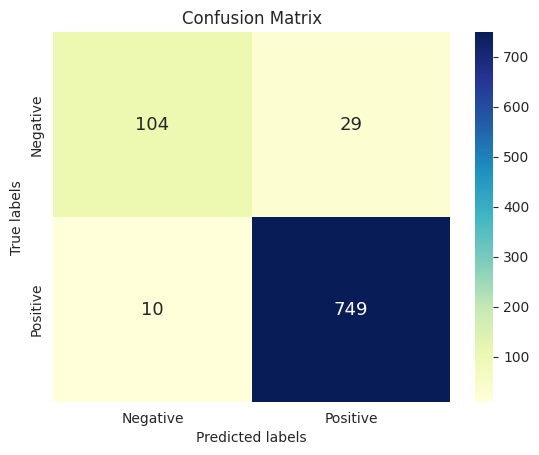

In [ ]:
ax = plt.subplots()
ax = sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g',
            annot_kws={"fontsize":13})

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.yaxis.set_ticklabels(['Negative', 'Positive'])
plt.show()

In [ ]:
target_names = ['Negative','Positive']
print(classification_report(y_test, predict, target_names=target_names))

              precision    recall  f1-score   support

    Negative       0.91      0.78      0.84       133
    Positive       0.96      0.99      0.97       759

    accuracy                           0.96       892
   macro avg       0.94      0.88      0.91       892
weighted avg       0.96      0.96      0.95       892



In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

akurasi = accuracy_score(y_test, predict)
print("Accuracy model:", round(akurasi,2))

recall = recall_score(y_test, predict)
print("Recall model:", round(recall,2))

precision = precision_score(y_test, predict)
print("Precision model:", round(precision,2))

Accuracy model: 0.96
Recall model: 0.99
Precision model: 0.96


Berdasarkan penelitian yang telah dilakukan menggunakan algoritma TextBlob dan algoritma Support Vector Machine, didapatkan nilai accuracy sebesar 94%, recall sebesar 99%, precision sebesar 96%, dan kesalahan prediksi sebanyak 9 data. Selain itu, diperoleh juga hasil prediksi data uji ulasan Google Play Store sebagai sentimen positif sebanyak 767 ulasan dan sentimen negatif sebanyak 149 ulasan. Diketahui bahwa algoritma Support Vector Machine cenderung memprediksi data uji sebagai sentimen positif dibandingkan sentimen negatif. Oleh karena itu, dapat ditarik sebuah asumsi bahwa pengguna senang, serta suka terhadap pelayanan, sistem, tampilan, jenis aplikasi, serta harga aplikasi di dalam google play store.